In [1]:
# install torch, matplotlib, pandas, numpy

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
#Important imports
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis
import numpy as np

#Choosing devise to be gpu if have one, else cpu
DEVICE = torch.device('cpu')#torch.device("cuda" if torch.cuda.is_available() else "cpu")  

In [5]:
#Creaating DataSet class with which we will transform our tabelar data into tensors
class DataSet(Dataset):

    def __init__(self,path):  
        #transformed csv file into tensor
        self.dataset = pd.read_csv(path).values

    def __len__(self):
        #return lenght of dataset
        return len(self.dataset)

    def __getitem__(self, i):
        #returns X and Y data by index
        return self.dataset[i,:-1], self.dataset[i,-1]            ## mb add transformation that normalizes

In [6]:
class Net(nn.Module):

    def __init__(self, n_features):
        super().__init__()
        #Setting number of initial features, which will be equal to number of features in dataset
        self.n_features = n_features
        
        #self.norm = nn.LayerNorm(n_features)
        #Setting some layers for our architecture
        self.fc1 = nn.Linear(self.n_features,16) # (input, ouput)
        self.fc2 = nn.Linear(16,32) # (input, ouput)
        self.fc3 = nn.Linear(32,1)  # (input, ouput)           

    def forward(self,x):
        #Running forward cycle of our network
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        #returning ouput
        return out

In [7]:
# Training loop for our network
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):

    #Initializing two lists to save accuracy to plot them later
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)

    train_loss = np.zeros(n_epochs)
    test_loss = np.zeros(n_epochs)
    #Going thru every epoch
    for epoch in range(n_epochs):

        # Train
        model.train()
        total = 0
        correct = 0
        current_train_loss = 0.0
        #Going thru example, thru every batch, in our case, thru all data at once
        for example, labels in train_loader:     

            #Translating calculations to gpu if is available
            example = example.to(DEVICE).float()
            labels = labels.to(DEVICE).float()

            # ensuring equal number of dimensions for labels and examples
            labels  = labels.unsqueeze(1)

            # running our data thru our data - forward
            predicted = model(example)
            # Getting loss of our network right now
            loss = loss_fn(predicted, labels)
            current_train_loss += loss
            
            total += labels.shape[0]
            predicted = torch.round(predicted)
            correct += (predicted == labels).sum()
            
            # Zeroing the gradient to not stack it from other iterations
            optimizer.zero_grad()
            #Runing backward part of the neural network, getting gradiets
            loss.backward()
            #Updating our paramters
            optimizer.step()
            
        train_accuracy[epoch] = correct / total
        train_loss[epoch] = current_train_loss / total
        
        
        # Test
        model.eval()
        correct = 0
        total = 0
        current_test_loss = 0
        
            
        correct = 0
        total = 0

        for examples, labels in test_loader:
            examples = examples.to(device=DEVICE).float()
            labels = labels.to(device=DEVICE).float()
            
            labels  = labels.unsqueeze(1)

            predicted = model(examples)
            
            loss = loss_fn(predicted, labels)
            current_test_loss += loss
            
            total += labels.shape[0]
            predicted = torch.round(predicted)

            correct += (predicted  == labels).sum()

        test_accuracy[epoch] = correct / total
        test_loss[epoch] = current_test_loss / total

        if (epoch+1) % 10 ==0:
            print(f'Epoch {epoch+1})', 
                  f'Train Accuracy: {train_accuracy[epoch]}',
                  f'Test Accuracy: {test_accuracy[epoch]}')

    #If set to True, print graph of train and validation loss
    if print_plot:

        #Setting x-ticks
        epochs_range = range(1,n_epochs+1)
        
       # fig, ax = plt.subplots(nrows=1, ncols=2)
        plt.subplots(figsize=(10, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_loss, 'g', label='Training loss')
        plt.plot(epochs_range, test_loss, 'b', label='Test loss')
        plt.title('Training and Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # #Ploting both curves, train and val 
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs_range, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

In [8]:
#Creating Dataset from csv file
data = DataSet(r'C:\Users\vova\Desktop\\heart.csv')

#Saving nr of examples and calculating number of validation samples
n_samples = len(data)
n_test = int(0.2*n_samples)

#Spliting into train and validation
train_set, test_set = torch.utils.data.random_split(data,  [n_samples-n_test, n_test])


# running train and validation sets thru dataloader that helps with parallelizing the data loading process with automatic batching
train_loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set), shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=len(test_set), shuffle=True)

C:\JupyterLab\resources\jlab_server\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.5308641791343689 Test Accuracy: 0.6166666746139526
Epoch 20) Train Accuracy: 0.6913580298423767 Test Accuracy: 0.6166666746139526
Epoch 30) Train Accuracy: 0.7201645970344543 Test Accuracy: 0.6833333373069763
Epoch 40) Train Accuracy: 0.7037037014961243 Test Accuracy: 0.6666666865348816
Epoch 50) Train Accuracy: 0.7283950448036194 Test Accuracy: 0.6666666865348816
Epoch 60) Train Accuracy: 0.7366254925727844 Test Accuracy: 0.6833333373069763
Epoch 70) Train Accuracy: 0.7407407164573669 Test Accuracy: 0.699999988079071
Epoch 80) Train Accuracy: 0.7613168954849243 Test Accuracy: 0.7166666388511658
Epoch 90) Train Accuracy: 0.7736625671386719 Test Accuracy: 0.699999988079071
Epoch 100) Train Accuracy: 0.7736625671386719 Test Accuracy: 0.7333333492279053
Epoch 110) Train Accuracy: 0.7860082387924194 Test Accuracy: 0.7666666507720947
Epoch 120) Train Accuracy: 0.798353910446167 Test Accuracy: 0.7666666507720947
Epoch 130) Train Accuracy: 0.8148148059844971 Test A

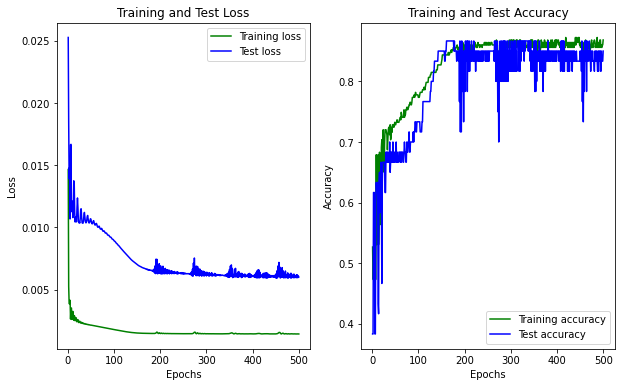

In [9]:
#Setting some hyperparameters and parameters
learning_rate = 1e-2

#Initializing model with nr of features from input
model = Net(len(data[0][0])).to(DEVICE)

#Optimizer and loss funtion
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()                                                     

#Running training loop on the data with set parameters
training_loop(
    n_epochs=500,
    optimizer=optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot=True,
    train_loader=train_loader,
    test_loader = test_loader
)

C:\JupyterLab\resources\jlab_server\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.4897119402885437 Test Accuracy: 0.4166666567325592
Epoch 20) Train Accuracy: 0.5761317014694214 Test Accuracy: 0.4333333373069763
Epoch 30) Train Accuracy: 0.6213991641998291 Test Accuracy: 0.6666666865348816
Epoch 40) Train Accuracy: 0.7201645970344543 Test Accuracy: 0.6833333373069763
Epoch 50) Train Accuracy: 0.7201645970344543 Test Accuracy: 0.6499999761581421
Epoch 60) Train Accuracy: 0.7242798209190369 Test Accuracy: 0.6499999761581421
Epoch 70) Train Accuracy: 0.7325102686882019 Test Accuracy: 0.699999988079071
Epoch 80) Train Accuracy: 0.748971164226532 Test Accuracy: 0.6666666865348816
Epoch 90) Train Accuracy: 0.748971164226532 Test Accuracy: 0.699999988079071
Epoch 100) Train Accuracy: 0.7695473432540894 Test Accuracy: 0.7666666507720947


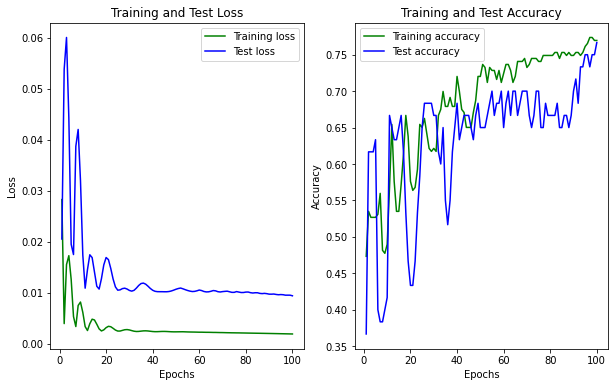

In [10]:
model = Net(len(data[0][0])).to(DEVICE)

#Optimizer and loss funtion
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()                                                     

#Running training loop on the data with set parameters
training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot=True,
    train_loader=train_loader,
    test_loader = test_loader
)